In [2]:
# Import python dataframes.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

** Step 1 - Clean Data **

In [3]:
# Read CSV
df = pd.read_csv('Walmart.csv', encoding_errors="ignore")

In [4]:
# Find Duplicates
df.duplicated().sum()

np.int64(51)

In [5]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [6]:
# Find all nulls 
df.isna().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

In [7]:
# Drop all nulls
df.dropna(inplace=True)
df.isna().sum()

invoice_id        0
Branch            0
City              0
category          0
unit_price        0
quantity          0
date              0
time              0
payment_method    0
rating            0
profit_margin     0
dtype: int64

In [8]:
# Column Datatypes
df.dtypes

invoice_id          int64
Branch             object
City               object
category           object
unit_price         object
quantity          float64
date               object
time               object
payment_method     object
rating            float64
profit_margin     float64
dtype: object

In [9]:
# Get a quick look of dataset
df.head(10)

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48
5,6,WALM026,Denton,Electronic accessories,$85.39,7.0,25/03/19,18:30:00,Ewallet,4.1,0.48
6,7,WALM088,Cleburne,Electronic accessories,$68.84,6.0,25/02/19,14:36:00,Ewallet,5.8,0.33
7,8,WALM100,Canyon,Home and lifestyle,$73.56,10.0,24/02/19,11:38:00,Ewallet,8.0,0.18
8,9,WALM066,Grapevine,Health and beauty,$36.26,2.0,10/01/19,17:15:00,Credit card,7.2,0.33
9,10,WALM065,Texas City,Food and beverages,$54.84,3.0,20/02/19,13:27:00,Credit card,5.9,0.33


In [10]:
# Remove '$' sign in front of values in column 'unit_price'
df['unit_price'] = df['unit_price'].str.replace("$", "").astype(float)

In [11]:
# Verify removal of '$' sign
df['unit_price'].head(5)

0    74.69
1    15.28
2    46.33
3    58.22
4    86.31
Name: unit_price, dtype: float64

In [12]:
df.dtypes

invoice_id          int64
Branch             object
City               object
category           object
unit_price        float64
quantity          float64
date               object
time               object
payment_method     object
rating            float64
profit_margin     float64
dtype: object

In [13]:
# Convert data and time format
df["date"] = pd.to_datetime(df["date"], format= "%d/%m/%y")
df["time"] = pd.to_datetime(df["time"], format = "%H:%M:%S").dt.time
df["time"]

0       13:08:00
1       10:29:00
2       13:23:00
3       20:33:00
4       10:37:00
          ...   
9995    10:10:00
9996    14:20:00
9997    16:00:00
9998    12:25:00
9999    09:48:00
Name: time, Length: 9969, dtype: object

In [14]:
# Extract Additional date features
df["day of week"] = df["date"].dt.day_name()
df["month"] = df["date"].dt.month_name()
df[["day of week", "month"]].head()

,day of week,month
0,Saturday,January
1,Friday,March
2,Sunday,March
3,Sunday,January
4,Friday,February


In [15]:
# Calculate and add total revenue for each sale 
df["total_revenue"] = df['unit_price'] * df['quantity']

** Step 2: Descriptive Analysis **

In [16]:
# Stastical description of the data
df.describe(include=[float, int])

,invoice_id,unit_price,quantity,rating,profit_margin,total_revenue
count,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000,9969.000000
mean,5010.116561,50.622142,2.355602,5.828839,0.393744,121.348819
std,2886.217349,21.203766,1.605455,1.763723,0.090659,112.678040
min,1.000000,10.080000,1.000000,3.000000,0.180000,10.170000
25%,2524.000000,32.000000,1.000000,4.000000,0.330000,54.000000
50%,5016.000000,51.000000,2.000000,6.000000,0.330000,88.000000
75%,7508.000000,69.000000,3.000000,7.000000,0.480000,156.000000
max,10000.000000,99.960000,10.000000,10.000000,0.570000,993.000000


In [17]:
# Frequency of Payment methods used
df["payment_method"].value_counts()

payment_method
Credit card    4256
Ewallet        3881
Cash           1832
Name: count, dtype: int64

In [18]:
# Busiest Days (Descending order)
df["day of week"].value_counts().sort_values(ascending=False)

day of week
Tuesday      1468
Thursday     1463
Wednesday    1459
Saturday     1441
Sunday       1411
Friday       1405
Monday       1322
Name: count, dtype: int64

** Step 3: Top Categories & Branches Analysis**

In [21]:
# Top 5 categories by Revenue
top_categories = df.groupby('category')['total_revenue'].sum().sort_values(ascending=False)
top_categories.head(5)

category
Fashion accessories       489480.90
Home and lifestyle        489250.06
Electronic accessories     78175.03
Food and beverages         53471.28
Sports and travel          52497.93
Name: total_revenue, dtype: float64

In [23]:
# Top 5 cities by Revenue
top_cities = df.groupby('City')['total_revenue'].sum().sort_values(ascending=False)
top_cities.head(5)

City
Weslaco        46351.79
Waxahachie     40703.33
Plano          25688.34
San Antonio    24950.56
Port Arthur    24524.37
Name: total_revenue, dtype: float64

In [42]:
# Most popular category in each city
pop_category_each_city = df.groupby(['City', 'category'])['total_revenue'].sum().reset_index()
pop_category_each_city = pop_category_each_city.loc[pop_category_each_city.groupby('City')['total_revenue'].idxmax()]
pop_category_each_city

,City,category,total_revenue
1,Abilene,Fashion accessories,4806.21
8,Alamo,Home and lifestyle,3505.86
13,Alice,Home and lifestyle,3168.02
16,Allen,Fashion accessories,3674.00
22,Amarillo,Fashion accessories,2636.48
...,...,...,...
490,Victoria,Home and lifestyle,8348.96
495,Waco,Home and lifestyle,7046.67
501,Waxahachie,Home and lifestyle,18178.76
505,Weatherford,Home and lifestyle,8757.04


** Step 4 - Sales Over time **

In [47]:
# Grouping sales by date
daily_sales = df.groupby('date')['total_revenue'].sum()
daily_sales.head()


date
2019-01-01    4519.22
2019-01-02    1852.86
2019-01-03    1979.17
2019-01-04    1546.37
2019-01-05    3368.27
Name: total_revenue, dtype: float64

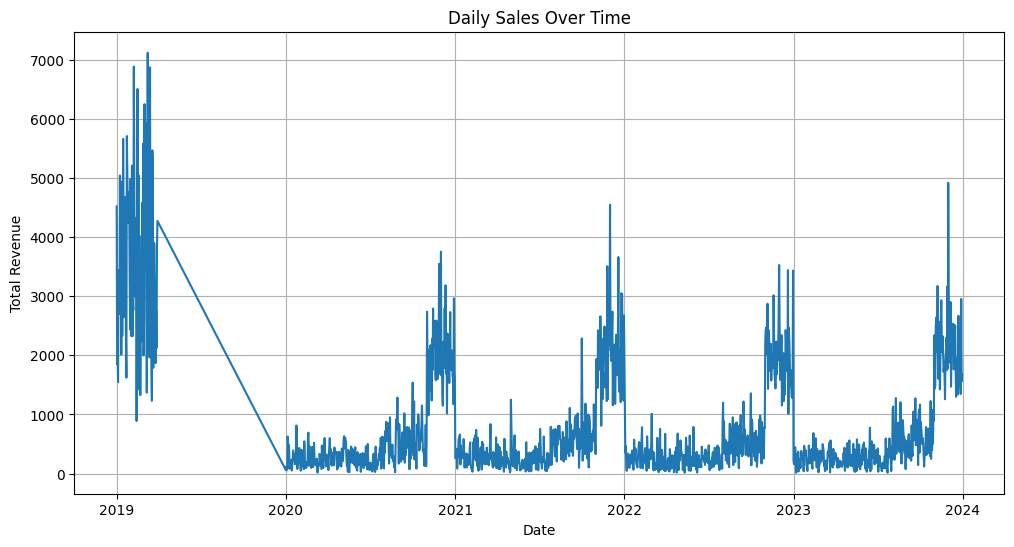

In [54]:
# Plot daily sales trend

plt.figure(figsize=(12,6))
plt.plot(daily_sales)
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid()
plt.show()